In [ ]:
## problem : By using IOT sensors to find labour performance in construction area

# object  : improve the productivity of construction labours

# constrain :maintaining iot senors is expensive 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
import scipy.stats as stats
import pylab

#labour dataset Data set 
labour = pd.read_csv(r"C:\Users\sidda\Desktop\labour1.csv")

labour.describe()
labour.info()
labour.duplicated().sum()
labour.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     100 non-null    object
 1   COUNTRY                100 non-null    object
 2   AGE                    100 non-null    int64 
 3   GENDER                 100 non-null    object
 4   DATE                   100 non-null    object
 5   SITE                   100 non-null    object
 6   ROLE                   100 non-null    object
 7   ENTRY_TIME             100 non-null    object
 8   EXIT_TIME              100 non-null    object
 9   NO OF HOURS WORKED     100 non-null    object
 10  EXTRA HOURS WORKED     100 non-null    int64 
 11  TOTAL HOURS            100 non-null    int64 
 12  ACTIVE TIME OF WORKER  100 non-null    int64 
 13  BODY TEMP              100 non-null    int64 
 14  HAZARDIOUS             100 non-null    int64 
dtypes: int64(6), object(9)
m

ID                       0
COUNTRY                  0
AGE                      0
GENDER                   0
DATE                     0
SITE                     0
ROLE                     0
ENTRY_TIME               0
EXIT_TIME                0
NO OF HOURS WORKED       0
EXTRA HOURS WORKED       0
TOTAL HOURS              0
ACTIVE TIME OF WORKER    0
BODY TEMP                0
HAZARDIOUS               0
dtype: int64

In [70]:
labour.head()

,ID,COUNTRY,AGE,GENDER,DATE,SITE,ROLE,ENTRY_TIME,EXIT_TIME,NO OF HOURS WORKED,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
0,Mc-01234,malsiya,32,male,12-11-2022,A,concreater,06:00,14:00,08:00,4,8,6,99,1
1,Mc-01235,malsiya,22,female,12-11-2022,B,lifter,06:00,14:00,08:00,0,8,6,98,0
2,Mc-01236,malsiya,45,male,12-11-2022,C,sweeper,06:30,14:00,08:00,0,8,4,102,0
3,Mc-01237,malsiya,36,male,12-11-2022,D,concreater,06:50,14:00,08:00,0,8,7,96,0
4,Mc-01238,malsiya,44,male,12-11-2022,E,concreater,06:00,18:00,08:00,4,12,10,95,0


In [71]:
labour6=labour.drop(["ID","COUNTRY","DATE"],axis=1)#dropping unwanted columns

# data preprocessing

In [72]:
# checking null values

In [73]:
labour.isnull().sum()

ID                       0
COUNTRY                  0
AGE                      0
GENDER                   0
DATE                     0
SITE                     0
ROLE                     0
ENTRY_TIME               0
EXIT_TIME                0
NO OF HOURS WORKED       0
EXTRA HOURS WORKED       0
TOTAL HOURS              0
ACTIVE TIME OF WORKER    0
BODY TEMP                0
HAZARDIOUS               0
dtype: int64

In [74]:
# checking outliers using boxplot

<AxesSubplot:>

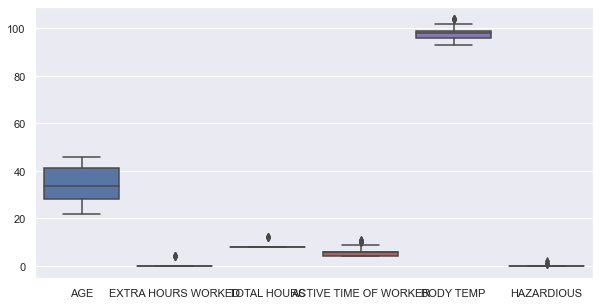

In [75]:
sns.boxplot(data=labour)

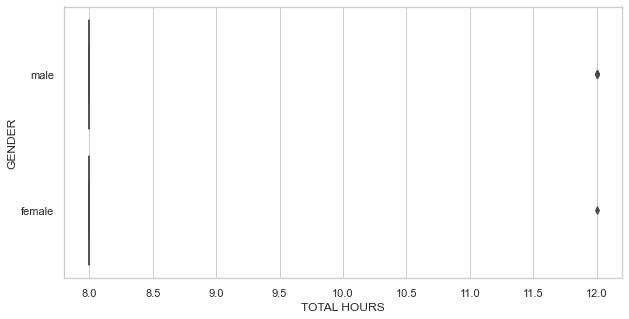

In [76]:
sns.set_style('whitegrid')
sns.boxplot( y=labour['GENDER'], x=labour['TOTAL HOURS']);

In [77]:
labour.columns

Index(['ID', 'COUNTRY', 'AGE', 'GENDER', 'DATE', 'SITE', 'ROLE', 'ENTRY_TIME',
       'EXIT_TIME', 'NO OF HOURS WORKED', 'EXTRA HOURS WORKED', 'TOTAL HOURS',
       'ACTIVE TIME OF WORKER', 'BODY TEMP', 'HAZARDIOUS'],
      dtype='object')

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


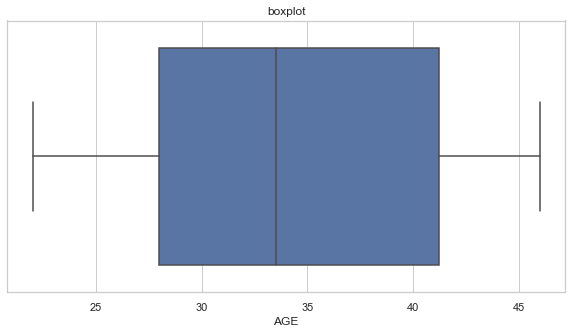

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


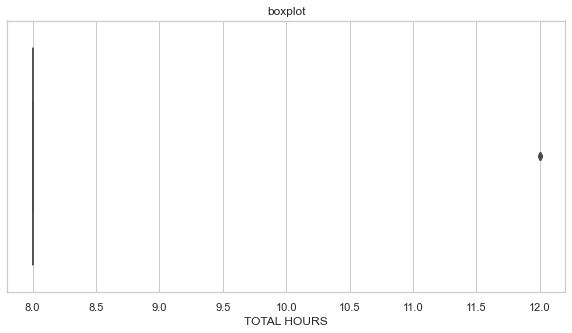

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


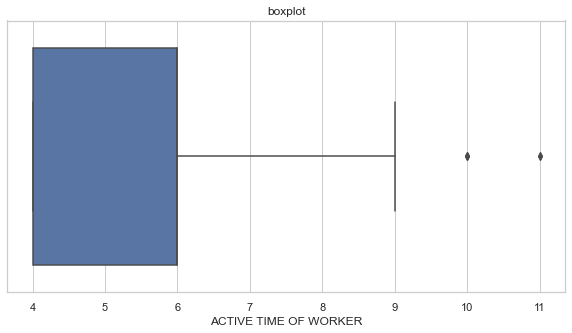

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


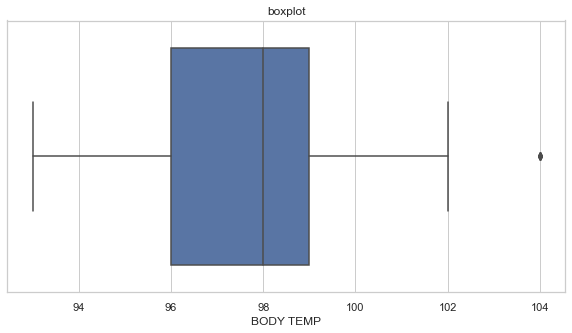

In [78]:
sns.boxplot(labour['AGE']);plt.title('boxplot');plt.show()
sns.boxplot(labour['TOTAL HOURS']);plt.title('boxplot');plt.show()
sns.boxplot(labour['ACTIVE TIME OF WORKER']);plt.title('boxplot');plt.show()
sns.boxplot(labour['BODY TEMP']);plt.title('boxplot');plt.show()

In [79]:
# outliers treatment

# data visulaize


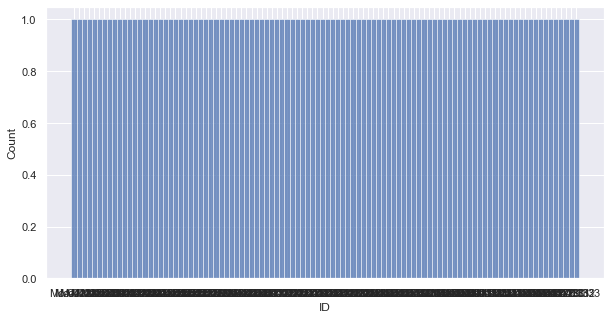

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


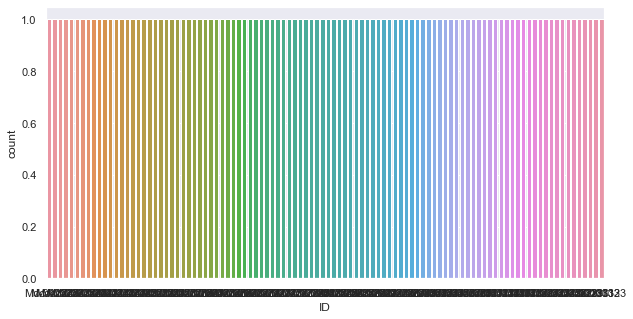

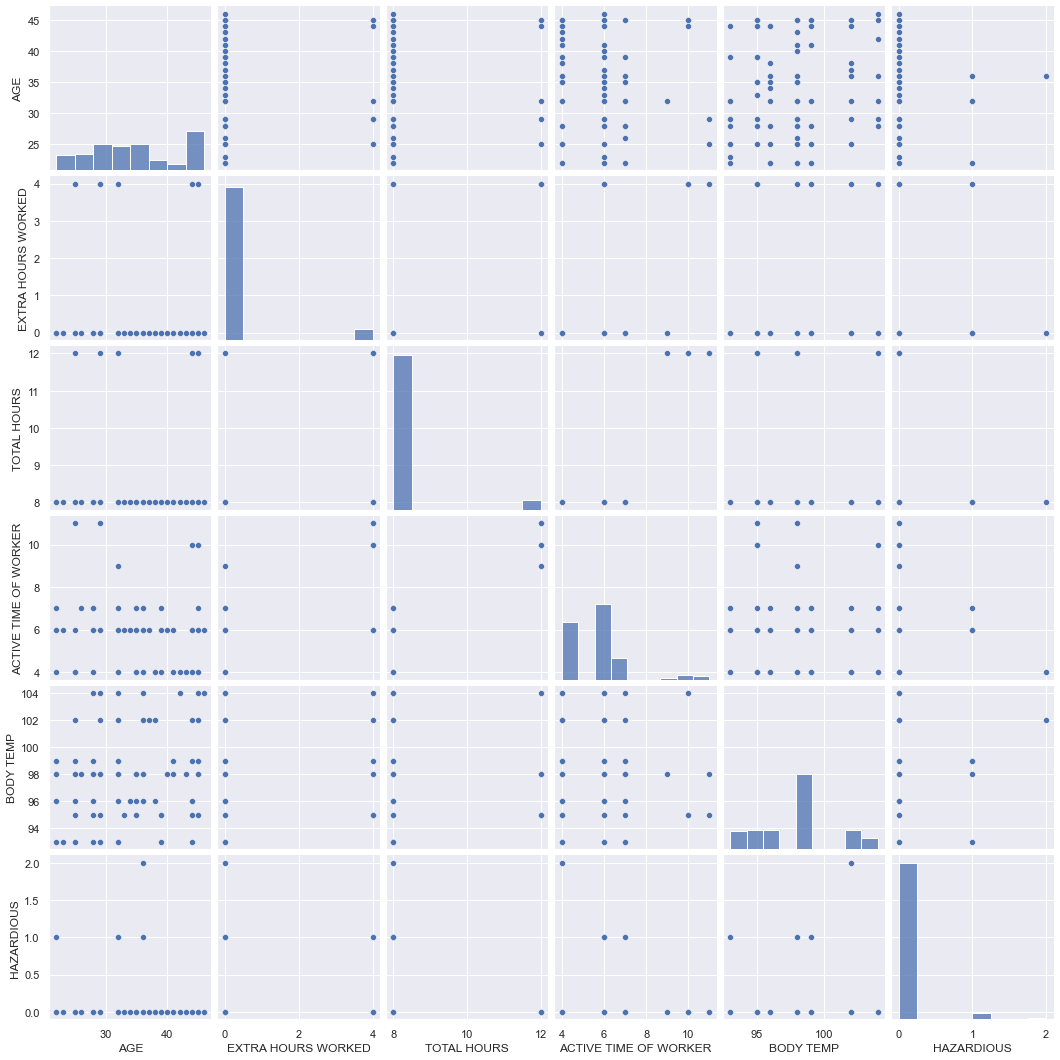

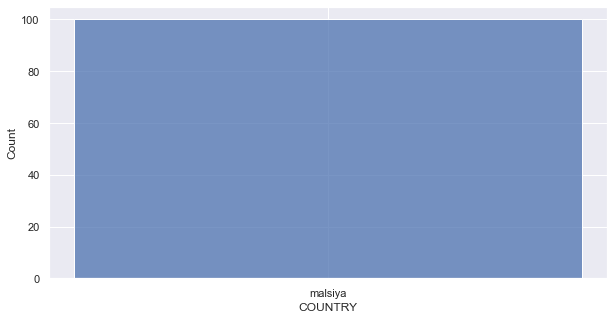

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


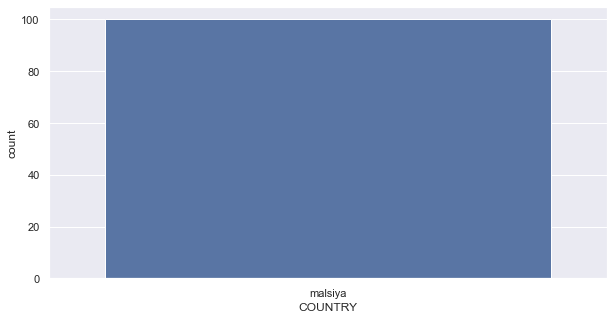

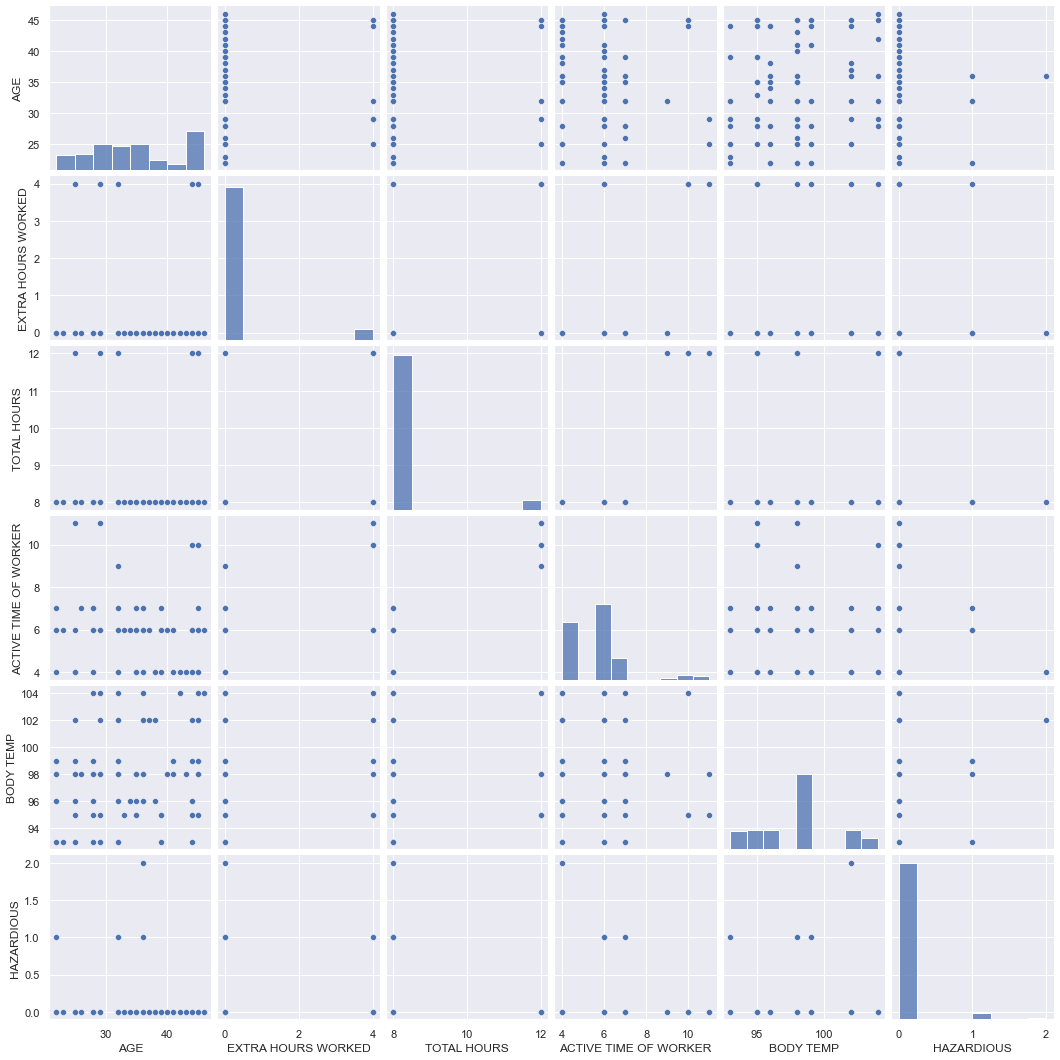

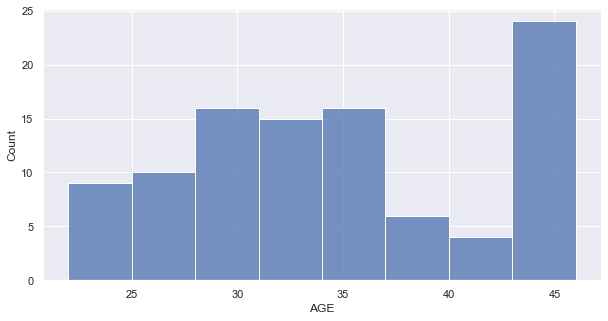

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


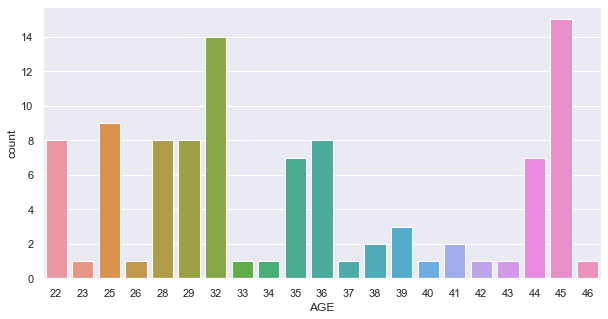

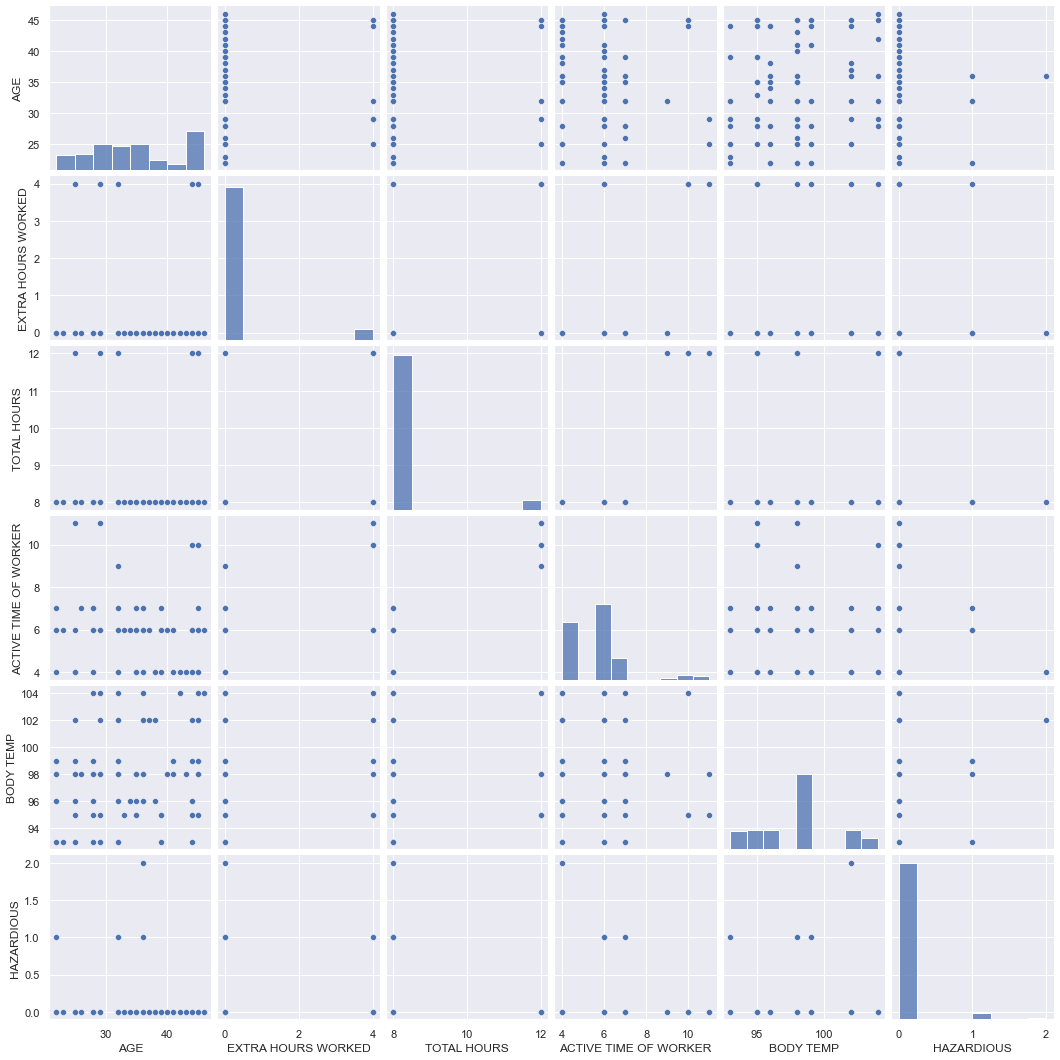

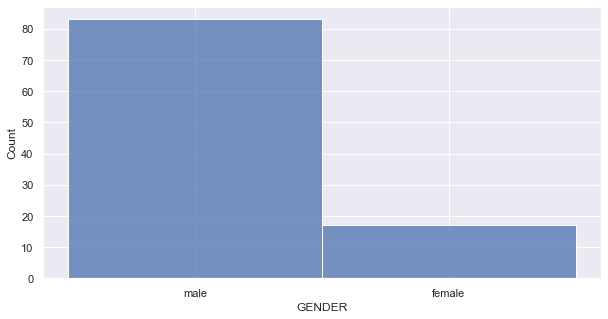

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


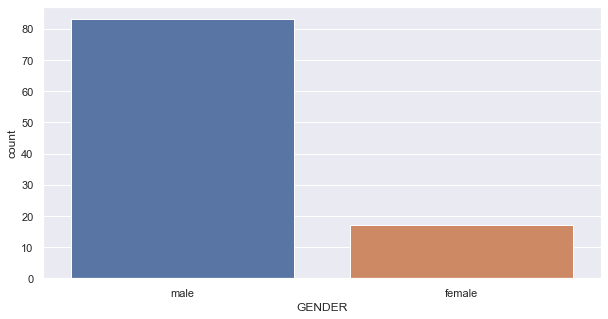

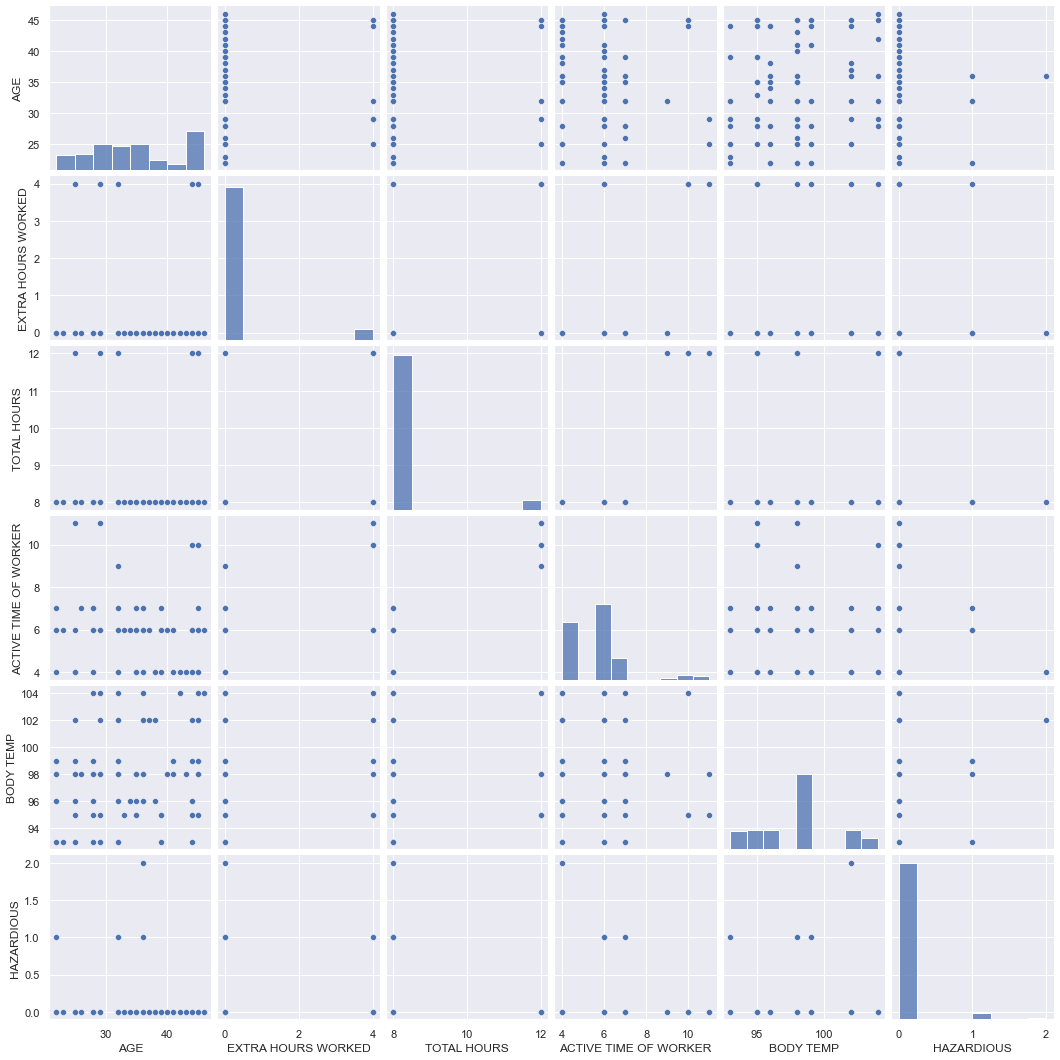

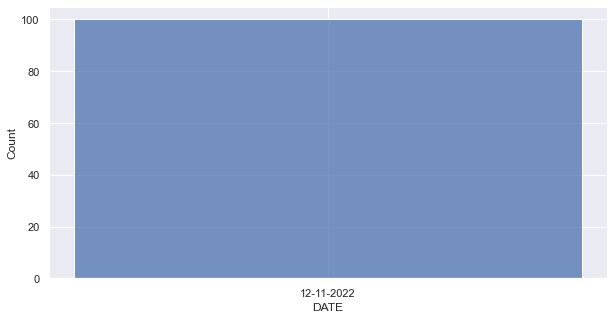

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


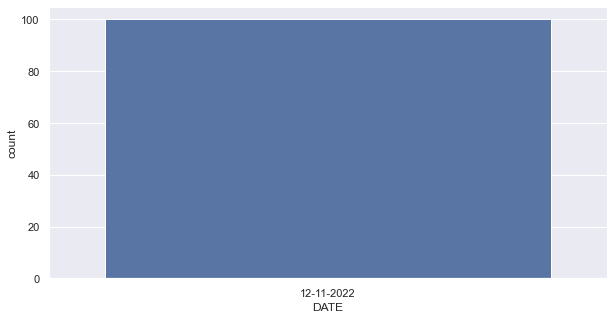

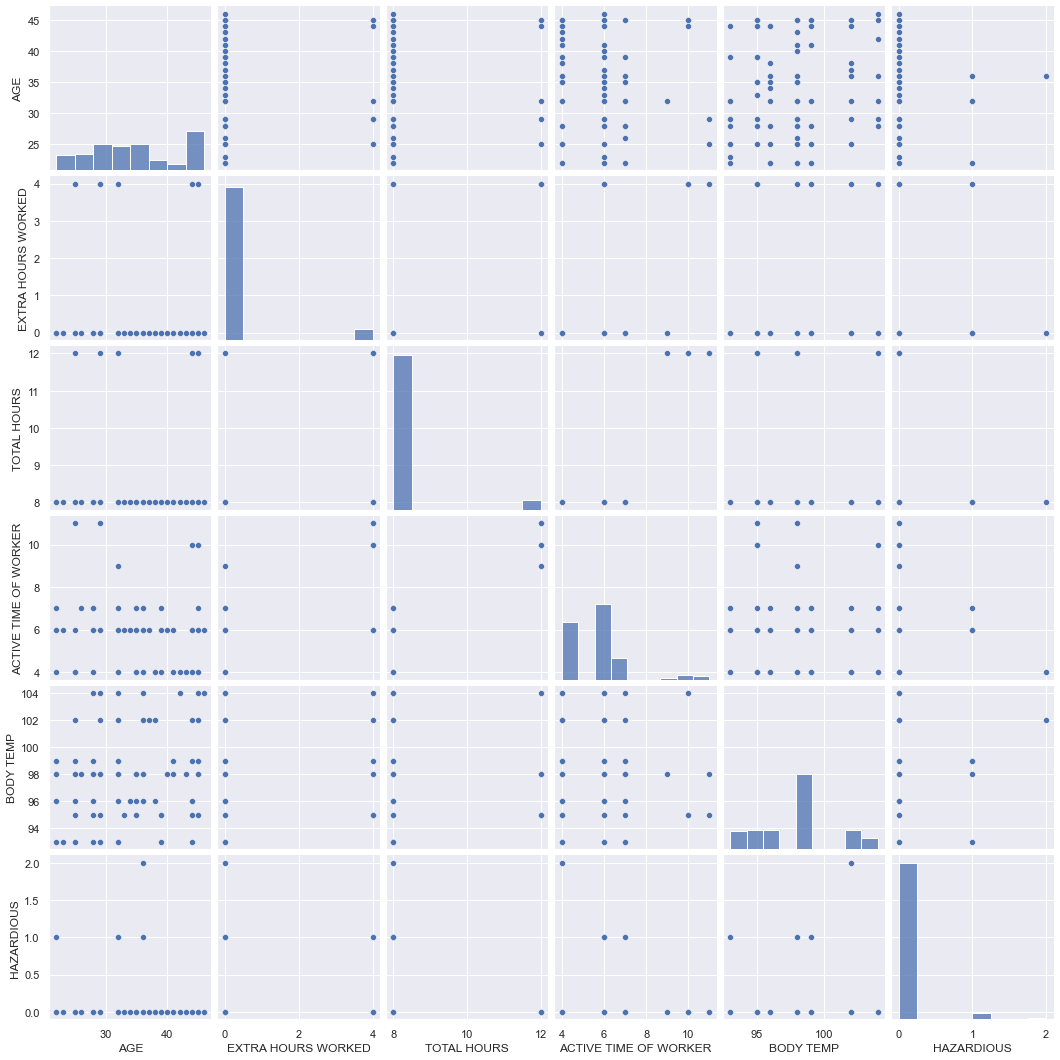

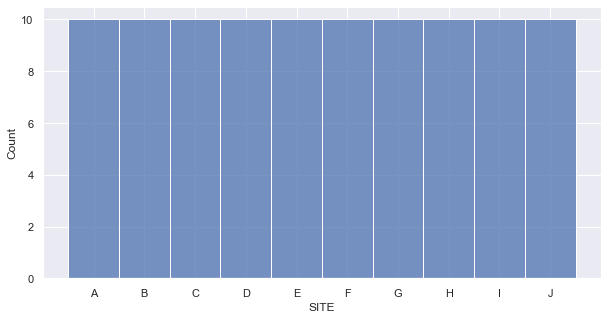

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


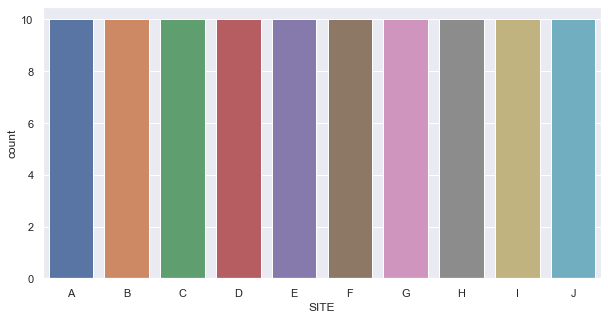

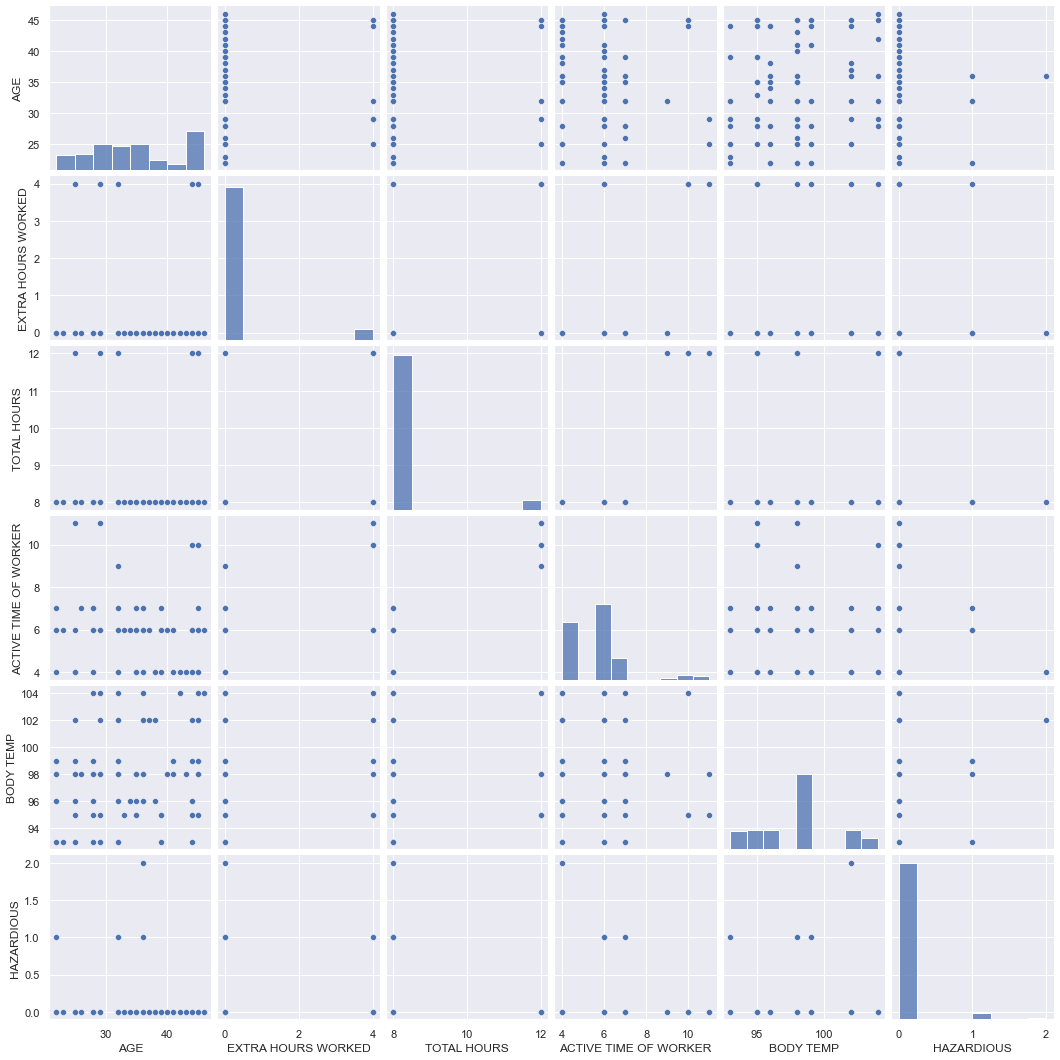

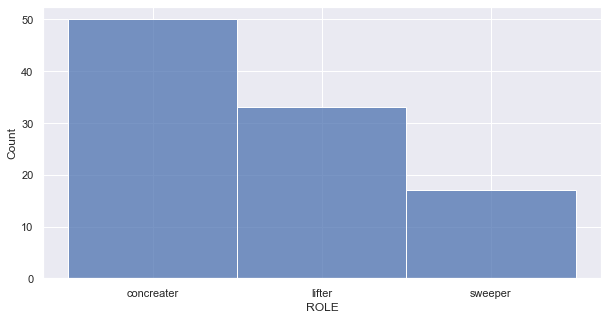

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


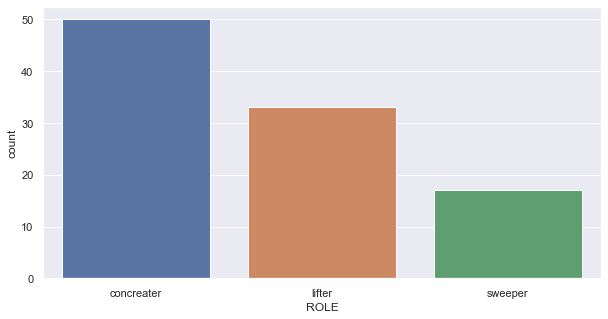

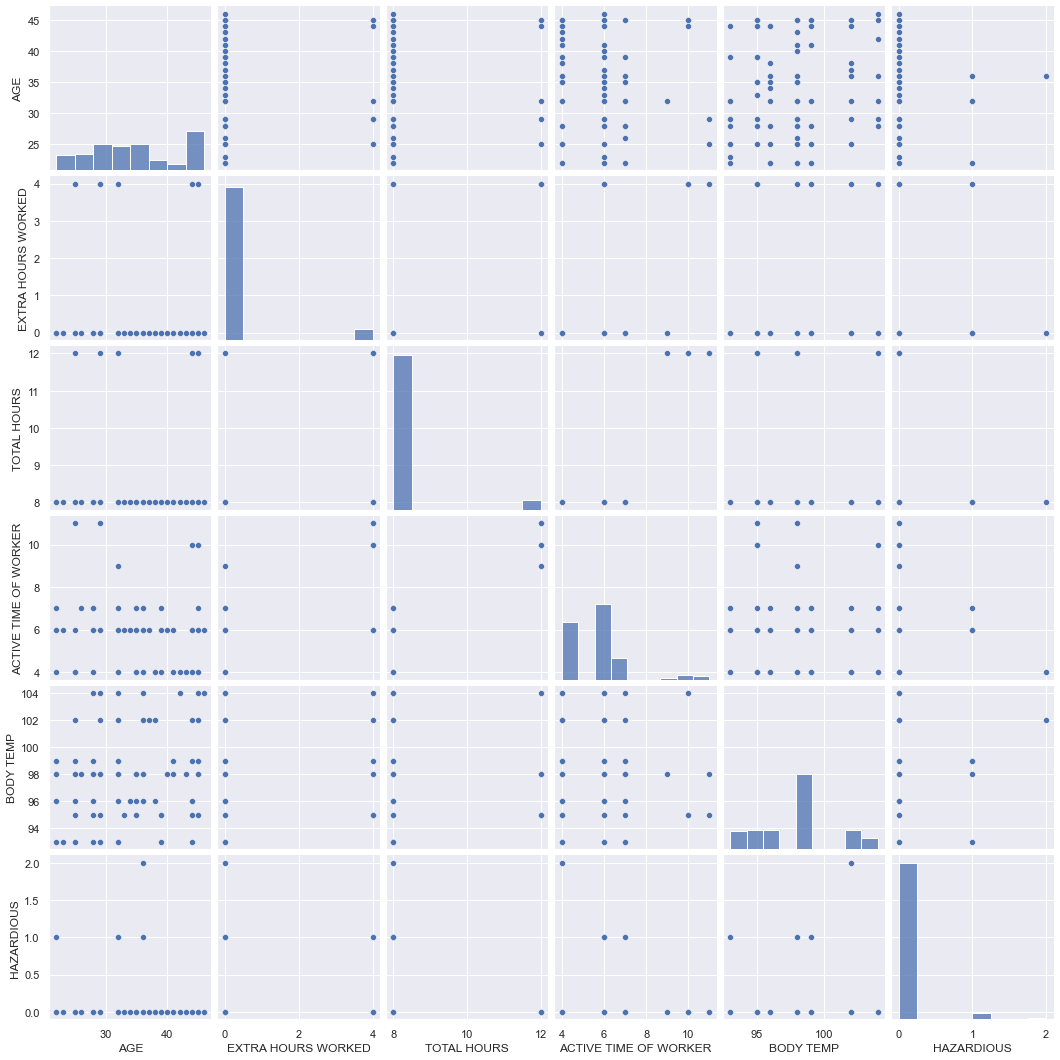

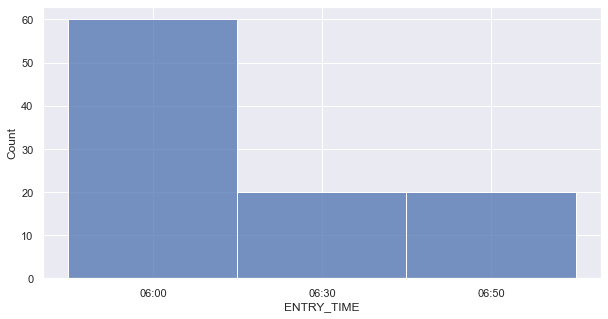

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


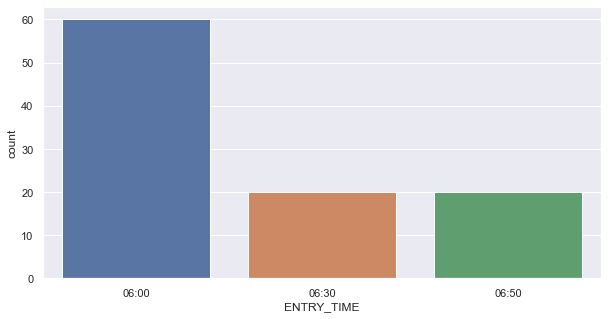

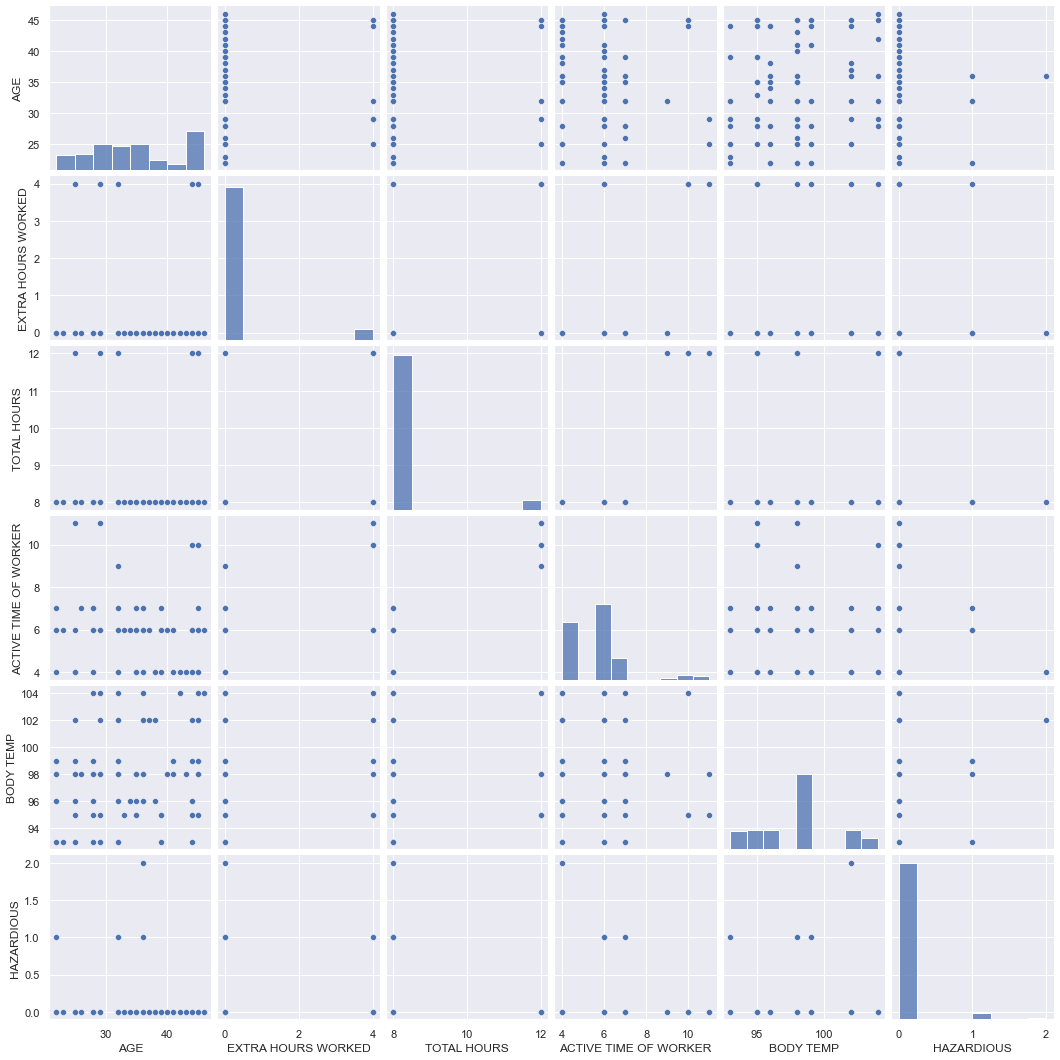

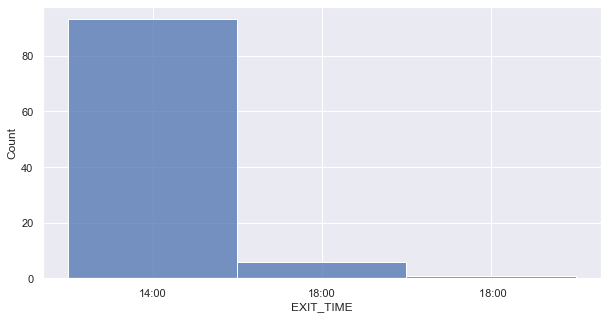

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


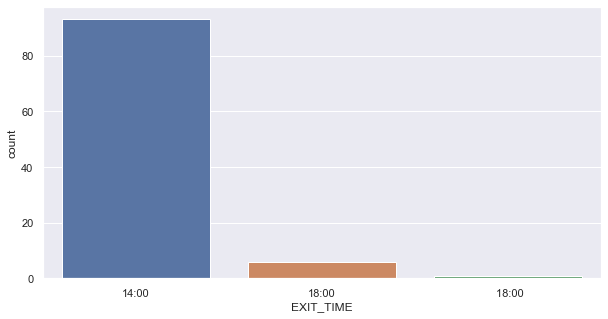

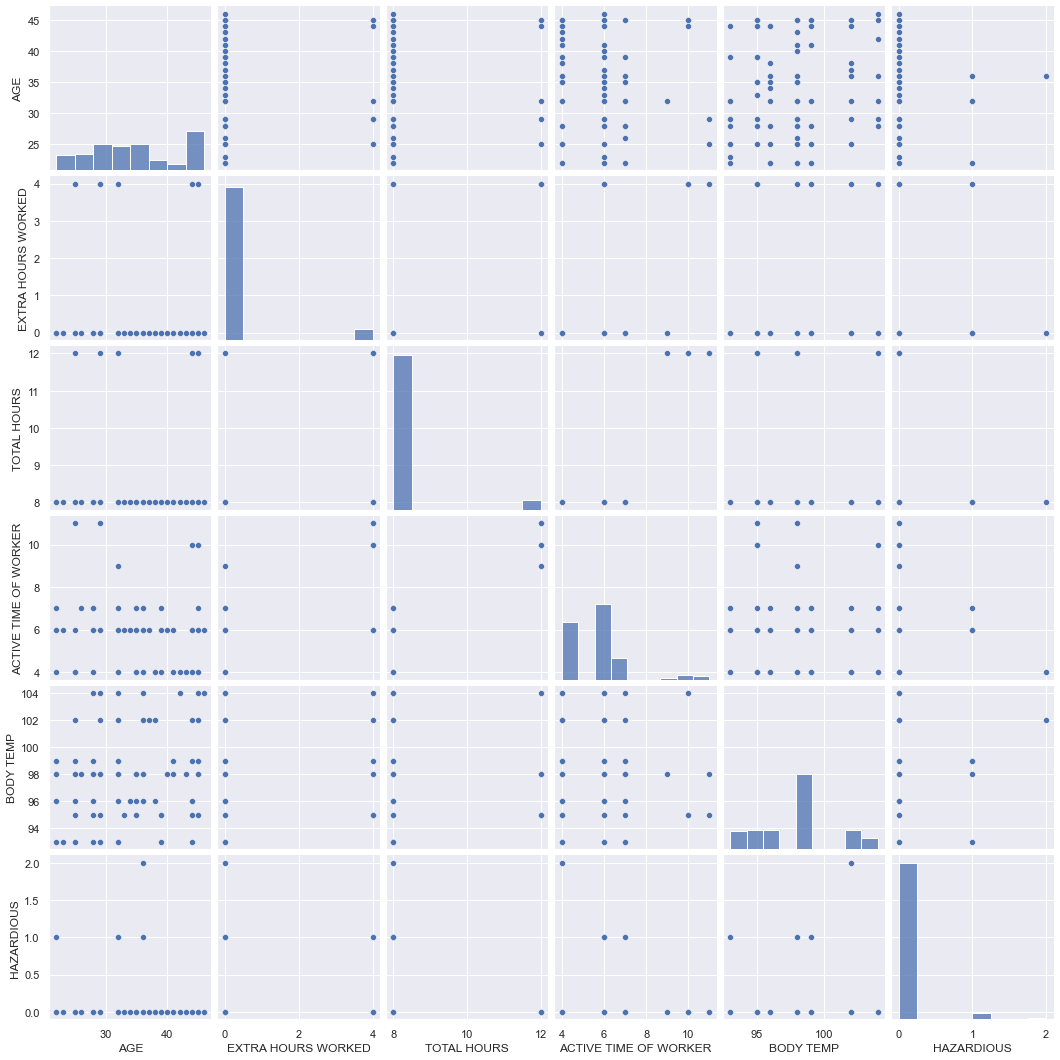

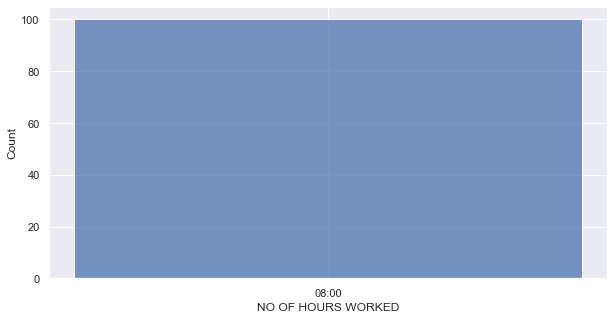

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


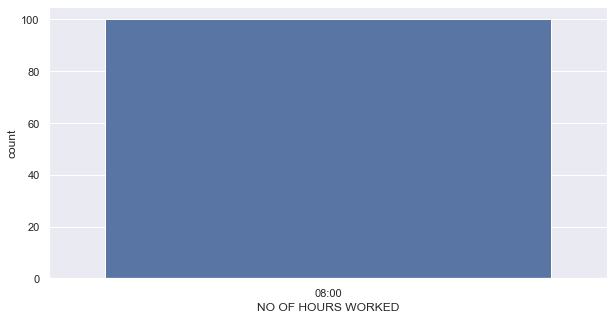

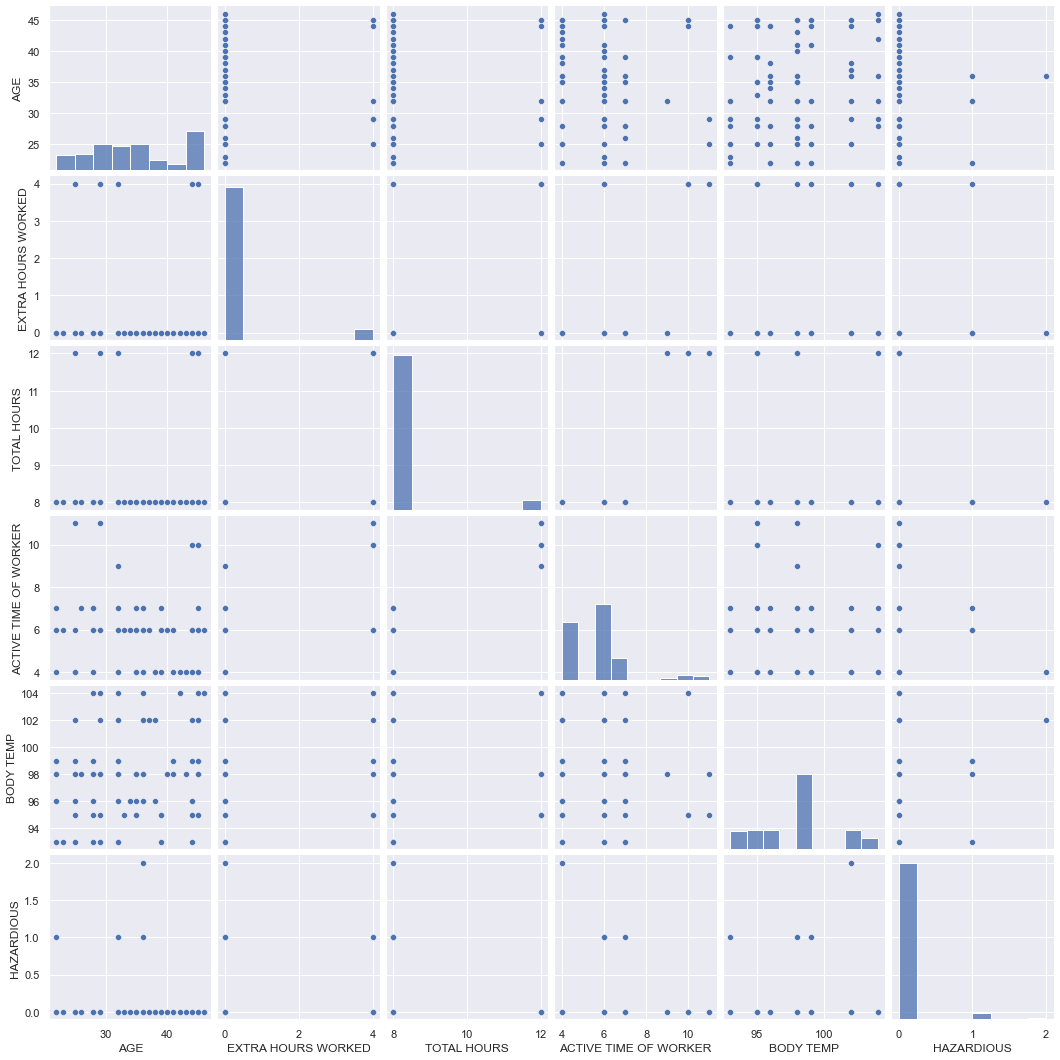

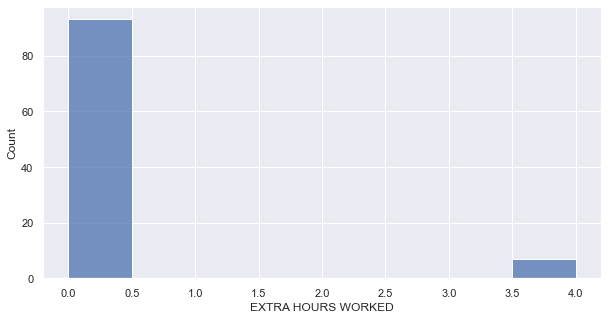

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


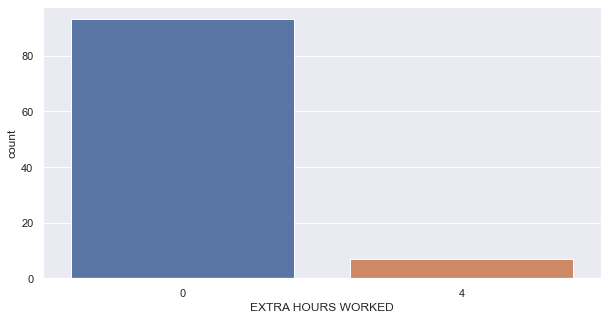

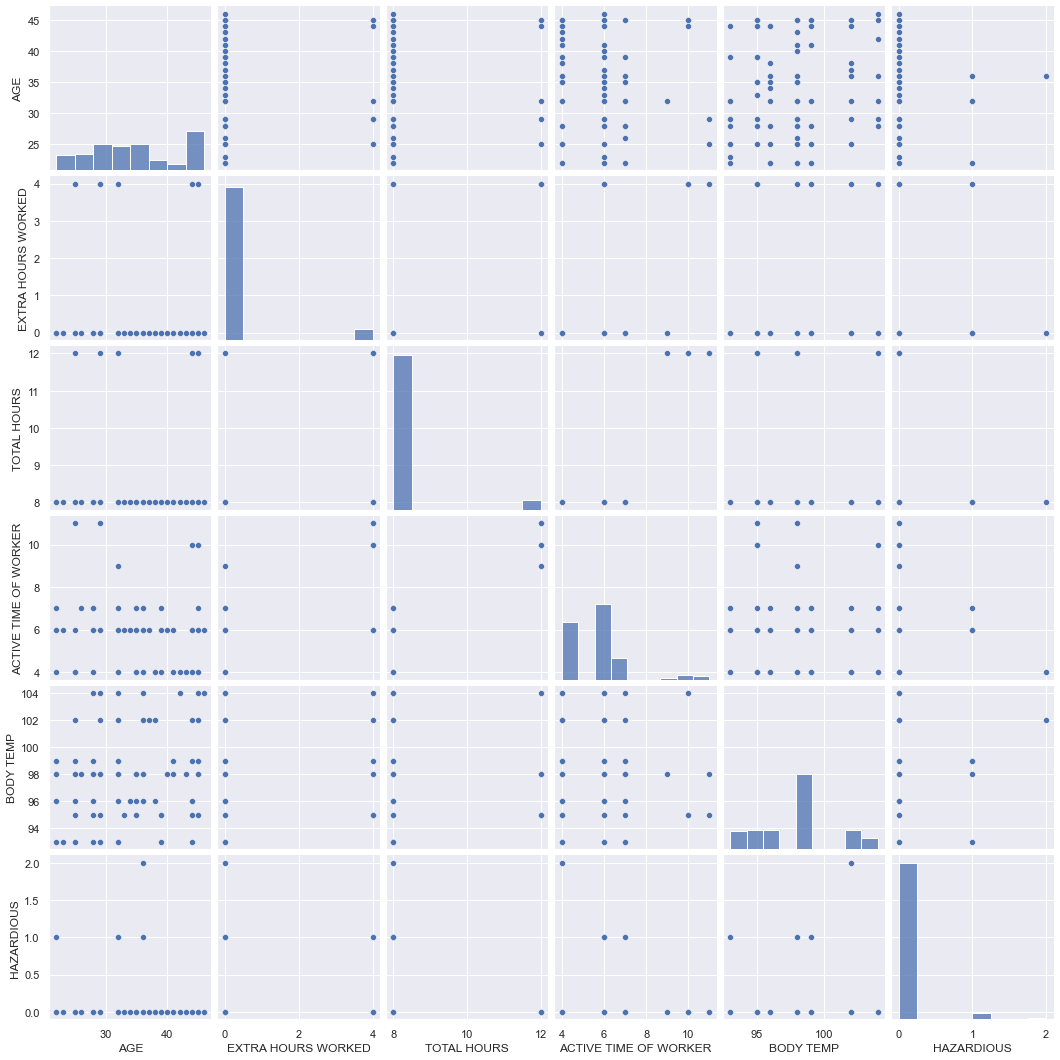

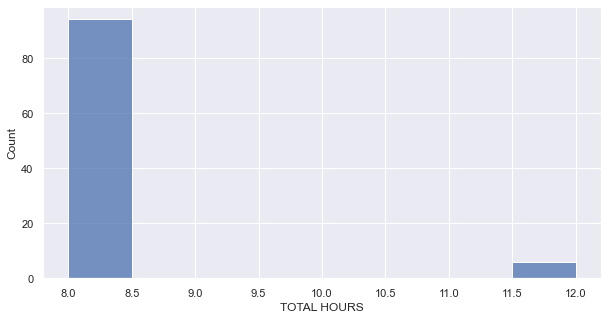

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


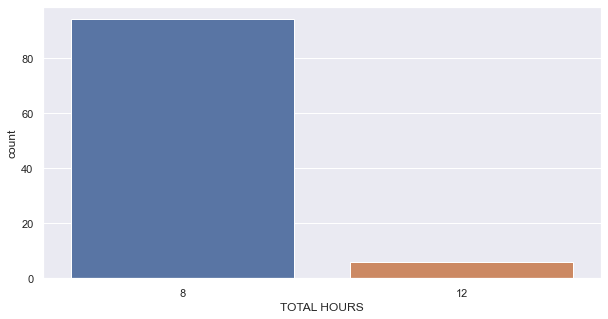

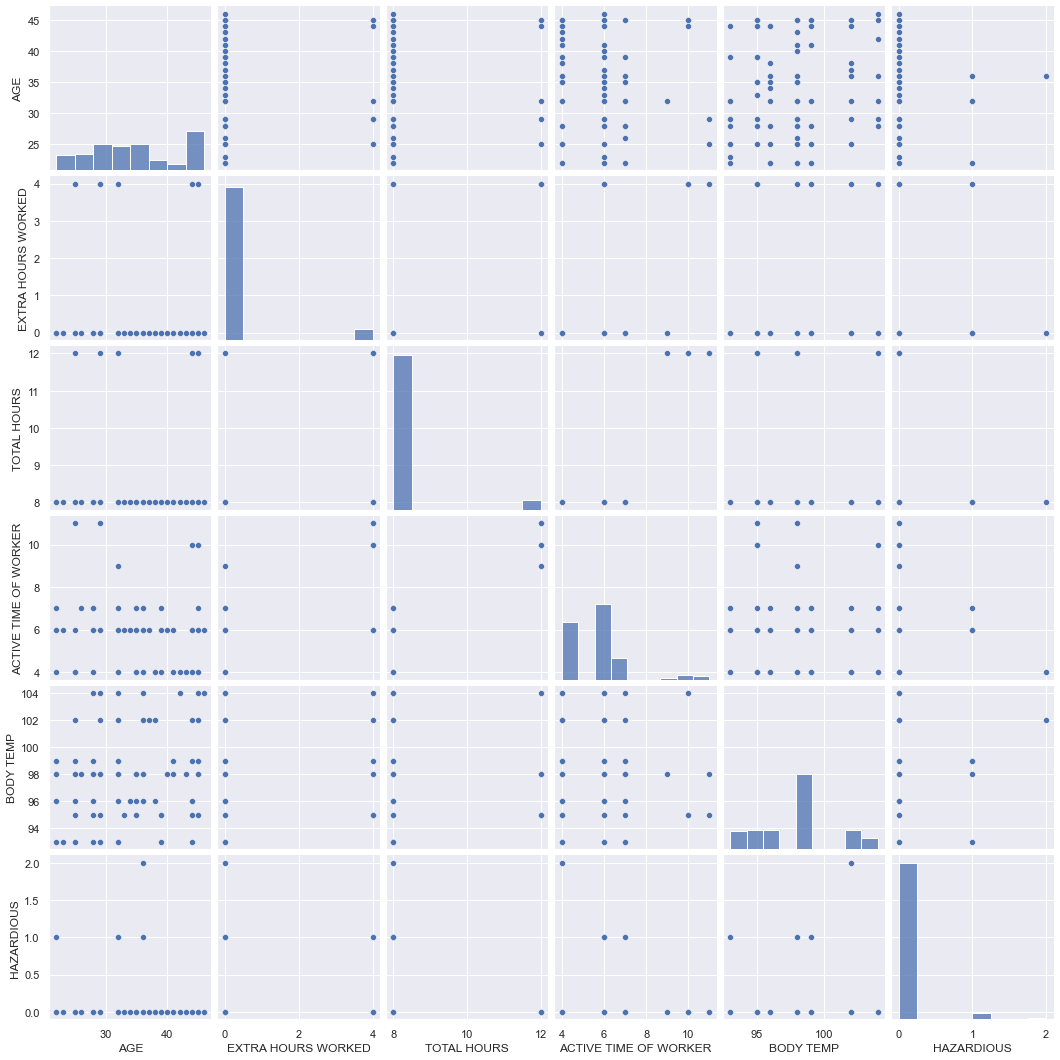

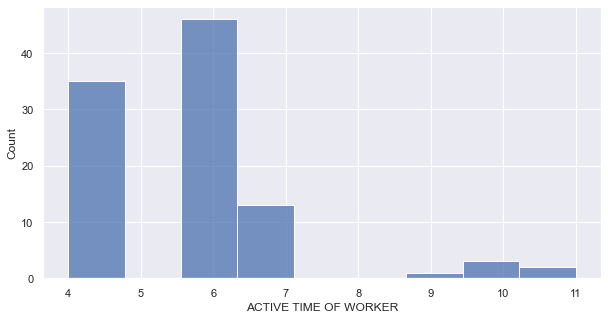

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


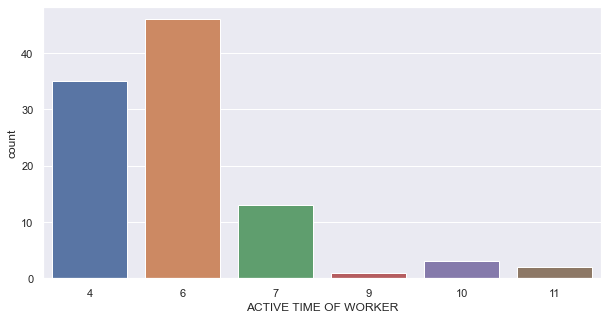

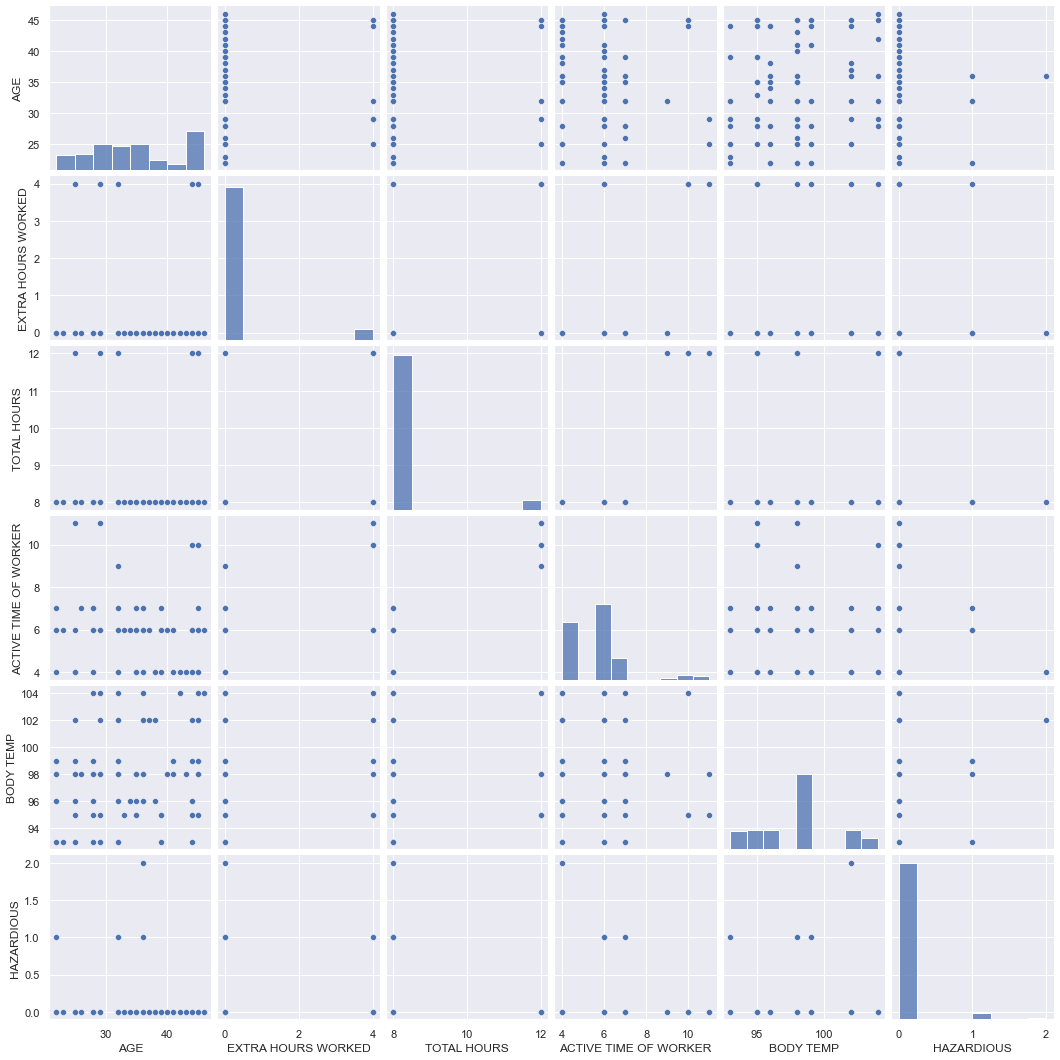

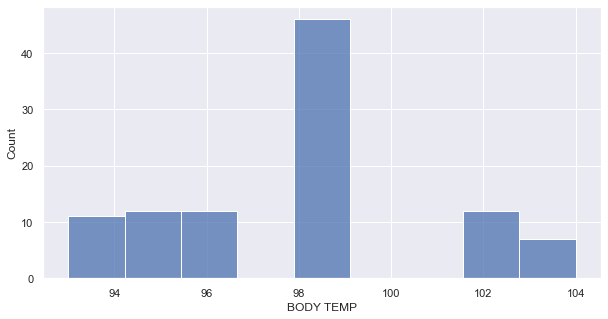

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


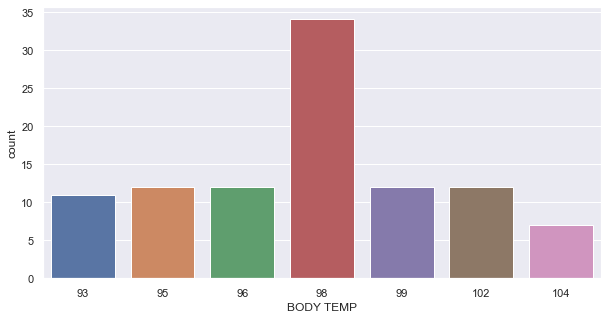

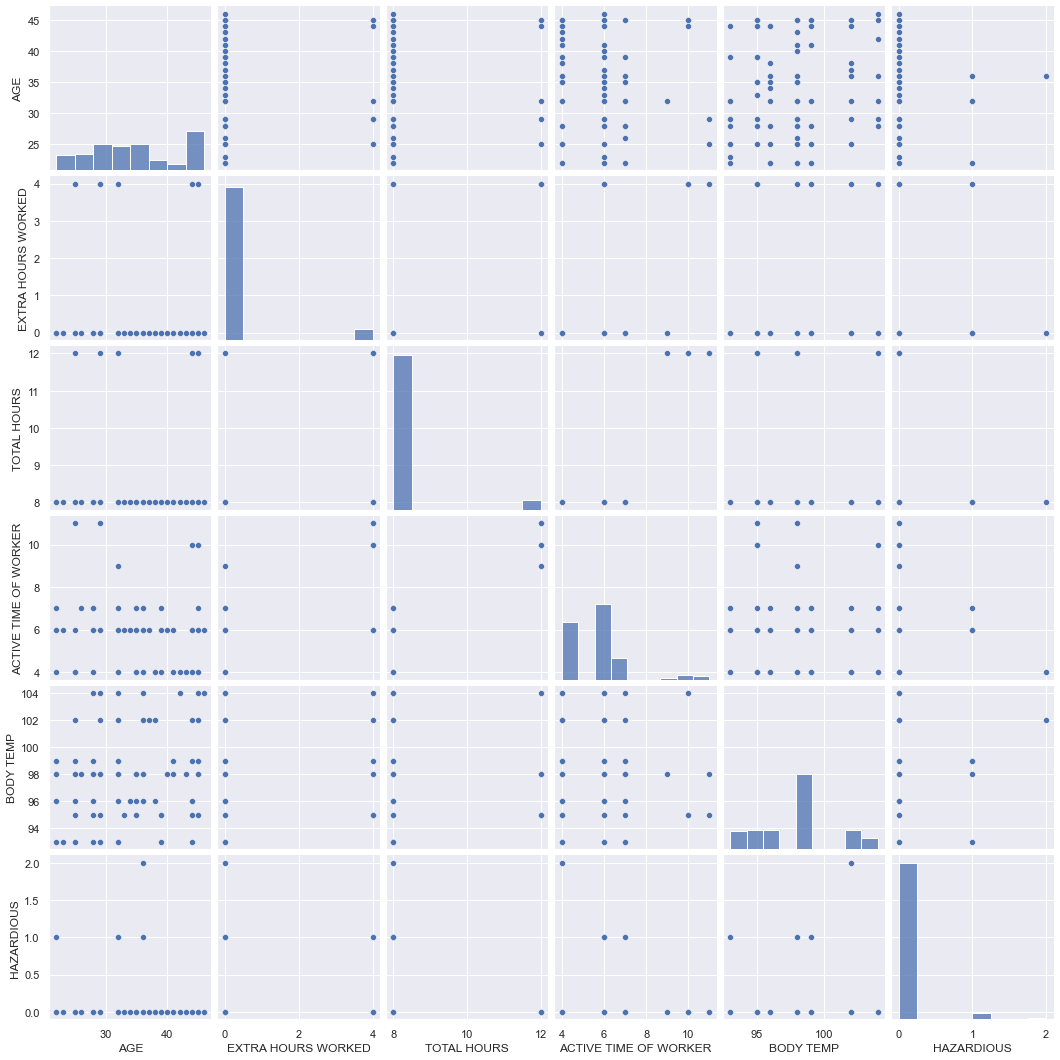

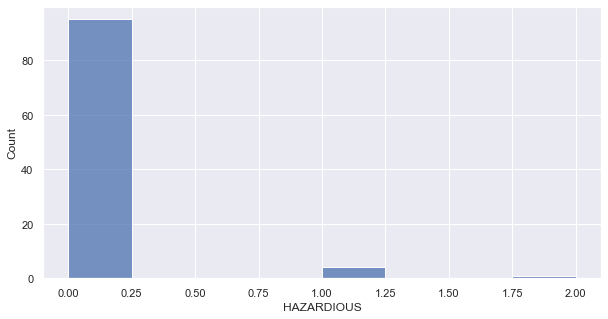

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


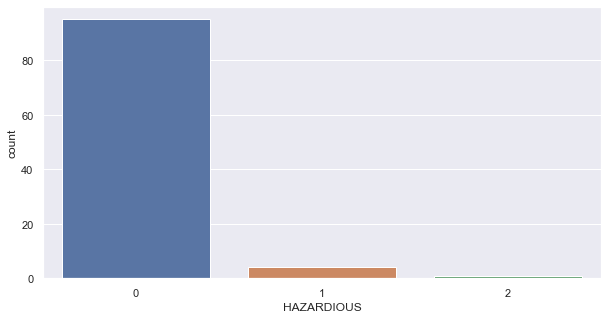

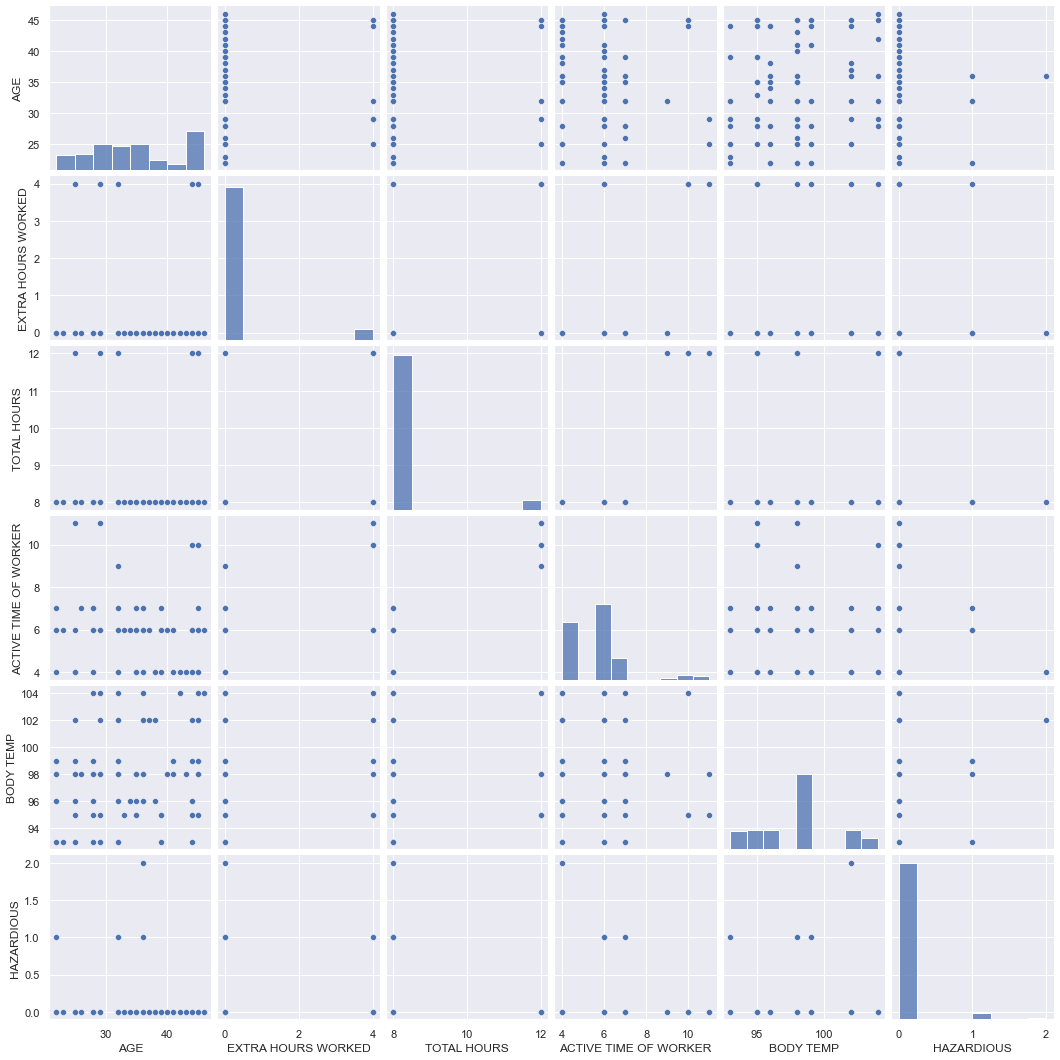

In [80]:
for i in labour.columns:         #visualize data using loops
    plt.figure()
    sns.set(rc= {"figure.figsize": (10, 5)})
    sns.histplot(labour[i]),plt.show()# histogram
    sns.countplot(labour[i])#countplot
    sns.pairplot(labour)



In [81]:
labour1=labour.select_dtypes(exclude='object')
labour2=labour.select_dtypes(include='object')

In [82]:
labour1.columns


Index(['AGE', 'EXTRA HOURS WORKED', 'TOTAL HOURS', 'ACTIVE TIME OF WORKER',
       'BODY TEMP', 'HAZARDIOUS'],
      dtype='object')

In [83]:
labour2.columns

Index(['ID', 'COUNTRY', 'GENDER', 'DATE', 'SITE', 'ROLE', 'ENTRY_TIME',
       'EXIT_TIME', 'NO OF HOURS WORKED'],
      dtype='object')

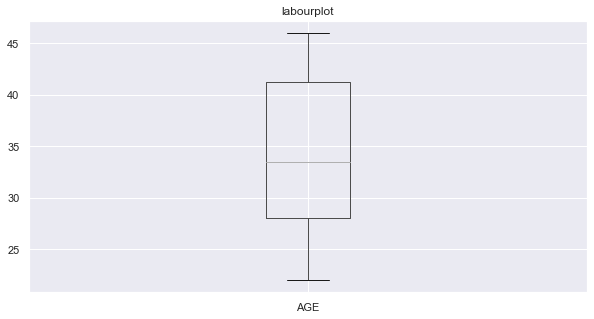

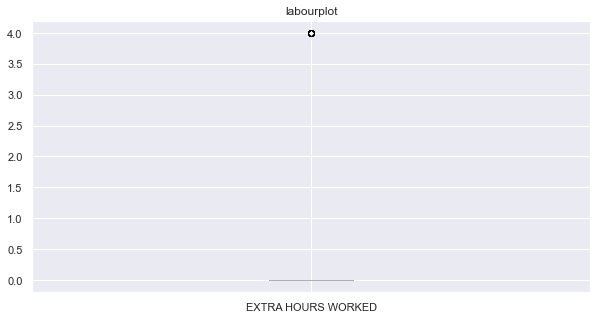

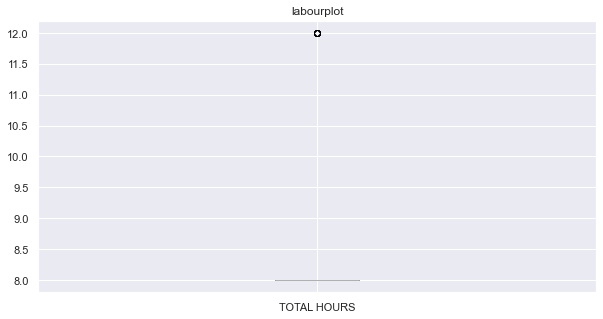

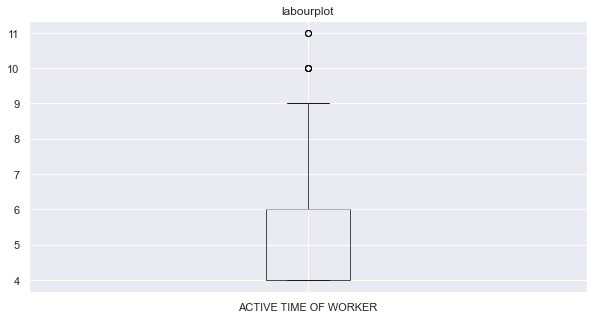

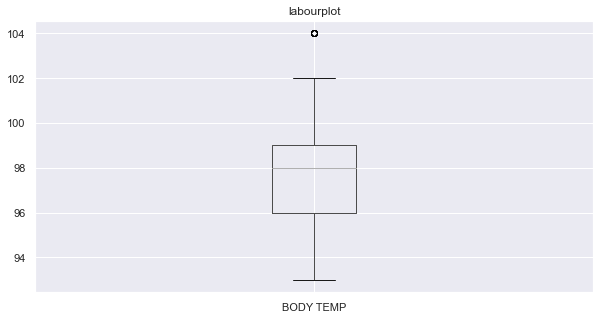

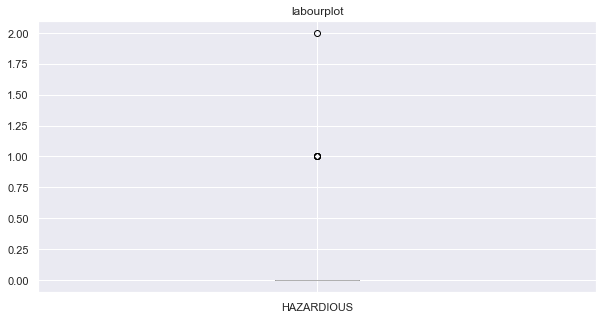

In [84]:
for i in labour1.columns:    #boxplot using loops
    labour1[[i]].boxplot()
    plt.title('labourplot')
    plt.show()

C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sidda\ansel\lib\site-packages\seab

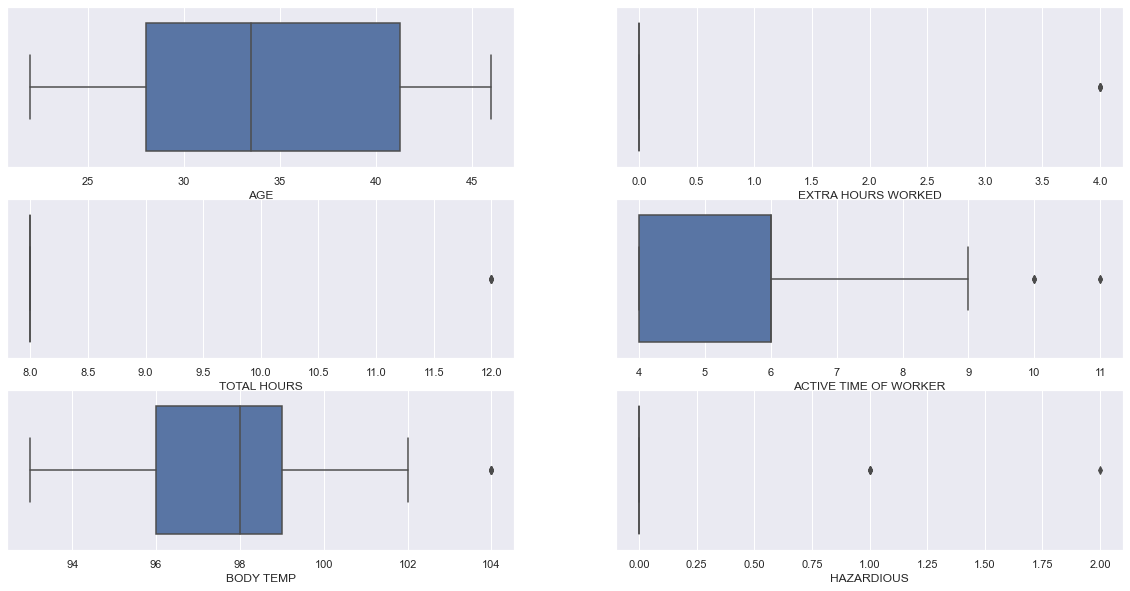

In [85]:
checking = labour1.columns

fig , ax = plt.subplots(3,2, figsize = (20,10))
for i , subplot in zip(checking,ax.flatten()):
    sns.boxplot(labour1[i],ax = subplot)
    

# outlier analysis

In [86]:
IQR = labour1.quantile(0.75) - labour1.quantile(0.25) # IQR - Inter quartile range IQR = Q3-Q1
lower_limit = labour1.quantile(0.25) - (IQR * 1.5) # Q1 - 1.5 * IQR
upper_limit = labour1.quantile(0.75) + (IQR * 1.5) # Q3 + 1.5 * IQR

In [87]:
IQR

AGE                      13.25
EXTRA HOURS WORKED        0.00
TOTAL HOURS               0.00
ACTIVE TIME OF WORKER     2.00
BODY TEMP                 3.00
HAZARDIOUS                0.00
dtype: float64

# winsorize

In [88]:
import feature_engine.outliers.winsorizer
from feature_engine.outliers.winsorizer import Winsorizer


In [89]:
winsorizer = Winsorizer(capping_method ='iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5, # 1.5 times of iqr
                          variables=['ACTIVE TIME OF WORKER'])

In [90]:
labour1['ACTIVE TIME OF WORKER'] = winsorizer.fit_transform(labour1[['ACTIVE TIME OF WORKER']])

C:\Users\sidda\AppData\Local\Temp/ipykernel_6176/1746291048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour1['ACTIVE TIME OF WORKER'] = winsorizer.fit_transform(labour1[['ACTIVE TIME OF WORKER']])


In [91]:
winsorizer = Winsorizer(capping_method ='iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5, # 1.5 times of iqr
                          variables=['BODY TEMP'])

In [92]:
labour1['BODY TEMP'] = winsorizer.fit_transform(labour1[['BODY TEMP']])

C:\Users\sidda\AppData\Local\Temp/ipykernel_6176/1485894032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour1['BODY TEMP'] = winsorizer.fit_transform(labour1[['BODY TEMP']])


C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sidda\ansel\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


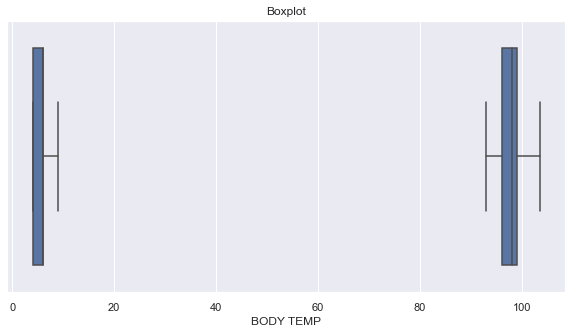

In [93]:
sns.boxplot(labour1['ACTIVE TIME OF WORKER']);
sns.boxplot(labour1['BODY TEMP']);
plt.title('Boxplot');
plt.show()

In [94]:
labour1.dtypes


AGE                        int64
EXTRA HOURS WORKED         int64
TOTAL HOURS                int64
ACTIVE TIME OF WORKER    float64
BODY TEMP                float64
HAZARDIOUS                 int64
dtype: object

In [95]:
labour1['ACTIVE TIME OF WORKER']=labour1['ACTIVE TIME OF WORKER'].astype('int64')
labour1['BODY TEMP']=labour1['BODY TEMP'].astype('int64')

C:\Users\sidda\AppData\Local\Temp/ipykernel_6176/1417330316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour1['ACTIVE TIME OF WORKER']=labour1['ACTIVE TIME OF WORKER'].astype('int64')
C:\Users\sidda\AppData\Local\Temp/ipykernel_6176/1417330316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour1['BODY TEMP']=labour1['BODY TEMP'].astype('int64')


In [96]:
labour1.dtypes

AGE                      int64
EXTRA HOURS WORKED       int64
TOTAL HOURS              int64
ACTIVE TIME OF WORKER    int64
BODY TEMP                int64
HAZARDIOUS               int64
dtype: object

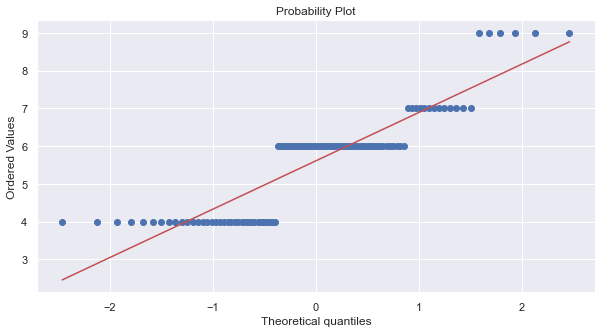

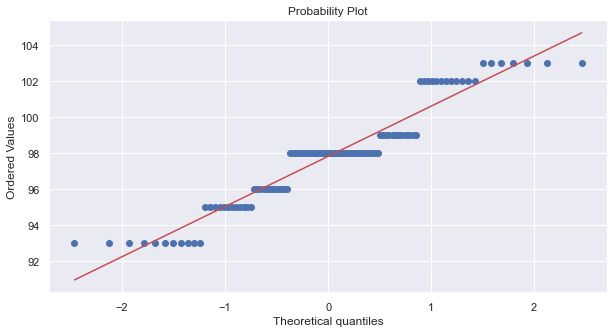

In [97]:
#Normal Quantile-Quantile Plot
import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed

stats.probplot(labour1['ACTIVE TIME OF WORKER'], dist='norm',plot=pylab);plt.show() #pylab is visual representation

stats.probplot(labour1['BODY TEMP'], dist='norm',plot=pylab);plt.show() # it is normally distributed

In [98]:
labour.describe()

,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,34.200000,0.28000,8.240000,5.680000,97.870000,0.060000
std,7.587869,1.02573,0.954733,1.588341,2.990406,0.277798
min,22.000000,0.00000,8.000000,4.000000,93.000000,0.000000
25%,28.000000,0.00000,8.000000,4.000000,96.000000,0.000000
50%,33.500000,0.00000,8.000000,6.000000,98.000000,0.000000
75%,41.250000,0.00000,8.000000,6.000000,99.000000,0.000000
max,46.000000,4.00000,12.000000,11.000000,104.000000,2.000000


In [99]:
labour['TOTAL HOURS'].skew()


3.762137305126658

In [100]:
labour1.kurt()
    

AGE                      -1.198355
EXTRA HOURS WORKED        9.908949
TOTAL HOURS              12.401350
ACTIVE TIME OF WORKER    -0.012819
BODY TEMP                -0.570467
HAZARDIOUS               28.062758
dtype: float64

In [101]:
labour1.skew()

AGE                      0.069533
EXTRA HOURS WORKED       3.422153
TOTAL HOURS              3.762137
ACTIVE TIME OF WORKER    0.479065
BODY TEMP                0.152810
HAZARDIOUS               5.097866
dtype: float64

# auto eda for checking

In [102]:
import pandas_profiling


In [103]:
pandas_profiling.ProfileReport(labour)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# dummy varible for catogorical

In [104]:
labour1.shape

(100, 6)

In [105]:
labour2.shape


(100, 9)

In [106]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [107]:
labour2['GENDER']= labelencoder.fit_transform(labour2['GENDER'])
labour2['SITE']= labelencoder.fit_transform(labour2['SITE'])
labour2['ROLE']= labelencoder.fit_transform(labour2['ROLE'])


C:\Users\sidda\AppData\Local\Temp/ipykernel_6176/2260131458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour2['GENDER']= labelencoder.fit_transform(labour2['GENDER'])
C:\Users\sidda\AppData\Local\Temp/ipykernel_6176/2260131458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour2['SITE']= labelencoder.fit_transform(labour2['SITE'])
C:\Users\sidda\AppData\Local\Temp/ipykernel_6176/2260131458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [108]:
labour2.head()

,ID,COUNTRY,GENDER,DATE,SITE,ROLE,ENTRY_TIME,EXIT_TIME,NO OF HOURS WORKED
0,Mc-01234,malsiya,1,12-11-2022,0,0,06:00,14:00,08:00
1,Mc-01235,malsiya,0,12-11-2022,1,1,06:00,14:00,08:00
2,Mc-01236,malsiya,1,12-11-2022,2,2,06:30,14:00,08:00
3,Mc-01237,malsiya,1,12-11-2022,3,0,06:50,14:00,08:00
4,Mc-01238,malsiya,1,12-11-2022,4,0,06:00,18:00,08:00


In [109]:
labour_new=pd.concat([labour2,labour1],axis=1)

In [110]:
labour_new.head()

,ID,COUNTRY,GENDER,DATE,SITE,ROLE,ENTRY_TIME,EXIT_TIME,NO OF HOURS WORKED,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
0,Mc-01234,malsiya,1,12-11-2022,0,0,06:00,14:00,08:00,32,4,8,6,99,1
1,Mc-01235,malsiya,0,12-11-2022,1,1,06:00,14:00,08:00,22,0,8,6,98,0
2,Mc-01236,malsiya,1,12-11-2022,2,2,06:30,14:00,08:00,45,0,8,4,102,0
3,Mc-01237,malsiya,1,12-11-2022,3,0,06:50,14:00,08:00,36,0,8,7,96,0
4,Mc-01238,malsiya,1,12-11-2022,4,0,06:00,18:00,08:00,44,4,12,9,95,0


In [111]:
labourf=labour_new.drop(['ID','COUNTRY','DATE','ENTRY_TIME','EXIT_TIME','NO OF HOURS WORKED'],axis=1)

In [112]:
labourf.shape


(100, 9)

In [113]:
labourf.head()

,GENDER,SITE,ROLE,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
0,1,0,0,32,4,8,6,99,1
1,0,1,1,22,0,8,6,98,0
2,1,2,2,45,0,8,4,102,0
3,1,3,0,36,0,8,7,96,0
4,1,4,0,44,4,12,9,95,0


In [114]:
labourf.corr()

,GENDER,SITE,ROLE,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
GENDER,1.000000,-0.060245,-0.199379,0.068407,0.019824,0.002242,0.007113,-0.013128,0.001926
SITE,-0.060245,1.000000,0.006972,-0.059949,-0.225147,-0.263880,-0.172207,0.049053,0.050383
ROLE,-0.199379,0.006972,1.000000,-0.030767,-0.088425,-0.057338,-0.066225,0.175867,0.047332
AGE,0.068407,-0.059949,-0.030767,1.000000,0.049836,0.082544,-0.056620,0.190351,-0.053670
EXTRA HOURS WORKED,0.019824,-0.225147,-0.088425,0.049836,1.000000,0.755850,0.501771,0.033132,0.082241
TOTAL HOURS,0.002242,-0.263880,-0.057338,0.082544,0.755850,1.000000,0.618441,-0.041529,-0.054842
ACTIVE TIME OF WORKER,0.007113,-0.172207,-0.066225,-0.056620,0.501771,0.618441,1.000000,-0.070707,-0.017242
BODY TEMP,-0.013128,0.049053,0.175867,0.190351,0.033132,-0.041529,-0.070707,1.000000,0.079009
HAZARDIOUS,0.001926,0.050383,0.047332,-0.053670,0.082241,-0.054842,-0.017242,0.079009,1.000000


# cluster the data using k means

In [115]:
def norm_func(i):                               #normilize the data
    x = (i - i.min())/ (i.max() - i.min())
    return (x)

In [116]:
labour_norm = norm_func(labourf.iloc[:, 3:])

In [117]:
labour_norm.head()

,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
0,0.416667,1.0,0.0,0.4,0.6,0.5
1,0.000000,0.0,0.0,0.4,0.5,0.0
2,0.958333,0.0,0.0,0.0,0.9,0.0
3,0.583333,0.0,0.0,0.6,0.3,0.0
4,0.916667,1.0,1.0,1.0,0.2,0.0


In [118]:
from sklearn.cluster import	KMeans

In [119]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(labour_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[27.306989755713165,
 20.08349297573435,
 16.859359411705903,
 14.501880411498831,
 12.439524726703283,
 11.251862555694794,
 10.249890754347991]

Text(0, 0.5, 'total_within_SS')

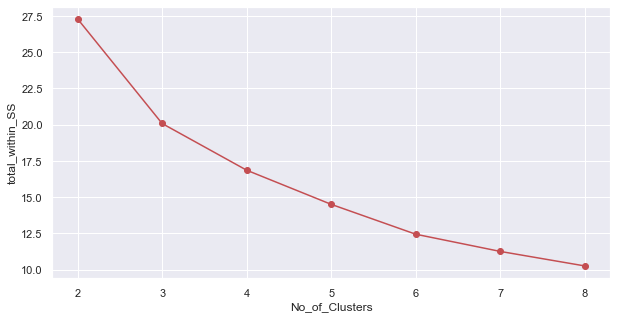

In [120]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [140]:
model = KMeans(n_clusters = 4)
model.fit(labour_norm)

KMeans(n_clusters=4)

In [141]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
labour_new['clust'] = mb # creating a  new column and assigning it to new column 


In [142]:
labour_new.head()

,ID,COUNTRY,GENDER,DATE,SITE,ROLE,ENTRY_TIME,EXIT_TIME,NO OF HOURS WORKED,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS,clust
0,Mc-01234,malsiya,1,12-11-2022,0,0,06:00,14:00,08:00,32,4,8,6,99,1,2
1,Mc-01235,malsiya,0,12-11-2022,1,1,06:00,14:00,08:00,22,0,8,6,98,0,3
2,Mc-01236,malsiya,1,12-11-2022,2,2,06:30,14:00,08:00,45,0,8,4,102,0,2
3,Mc-01237,malsiya,1,12-11-2022,3,0,06:50,14:00,08:00,36,0,8,7,96,0,0
4,Mc-01238,malsiya,1,12-11-2022,4,0,06:00,18:00,08:00,44,4,12,9,95,0,1


In [124]:
labour_norm.head()

,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
0,0.416667,1.0,0.0,0.4,0.6,0.5
1,0.000000,0.0,0.0,0.4,0.5,0.0
2,0.958333,0.0,0.0,0.0,0.9,0.0
3,0.583333,0.0,0.0,0.6,0.3,0.0
4,0.916667,1.0,1.0,1.0,0.2,0.0


In [125]:
labour33= labour_new.iloc[:,:]
labour33.head()

labour33.iloc[:, :].groupby(labour_new.clust).mean()


,GENDER,SITE,ROLE,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
clust,,,,,,,,,
0,0.875000,4.575000,0.550000,39.425000,0.000000,8.0,5.150000,97.050000,0.025000
1,0.771429,5.000000,0.685714,26.685714,0.000000,8.0,5.685714,96.371429,0.057143
2,0.833333,1.500000,0.500000,36.666667,3.333333,12.0,9.000000,97.333333,0.000000
3,0.842105,4.368421,0.947368,36.263158,0.421053,8.0,5.368421,102.157895,0.157895


In [126]:
labour33.head()

,ID,COUNTRY,GENDER,DATE,SITE,ROLE,ENTRY_TIME,EXIT_TIME,NO OF HOURS WORKED,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS,clust
0,Mc-01234,malsiya,1,12-11-2022,0,0,06:00,14:00,08:00,32,4,8,6,99,1,3
1,Mc-01235,malsiya,0,12-11-2022,1,1,06:00,14:00,08:00,22,0,8,6,98,0,1
2,Mc-01236,malsiya,1,12-11-2022,2,2,06:30,14:00,08:00,45,0,8,4,102,0,3
3,Mc-01237,malsiya,1,12-11-2022,3,0,06:50,14:00,08:00,36,0,8,7,96,0,0
4,Mc-01238,malsiya,1,12-11-2022,4,0,06:00,18:00,08:00,44,4,12,9,95,0,2


In [127]:
labour_new.iloc[:, :].groupby(labour_new.clust).mean()

,GENDER,SITE,ROLE,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS
clust,,,,,,,,,
0,0.875000,4.575000,0.550000,39.425000,0.000000,8.0,5.150000,97.050000,0.025000
1,0.771429,5.000000,0.685714,26.685714,0.000000,8.0,5.685714,96.371429,0.057143
2,0.833333,1.500000,0.500000,36.666667,3.333333,12.0,9.000000,97.333333,0.000000
3,0.842105,4.368421,0.947368,36.263158,0.421053,8.0,5.368421,102.157895,0.157895


In [138]:
# converting class vaiable to numerical
l

SyntaxError: invalid syntax (Temp/ipykernel_6176/47775480.py, line 2)

In [137]:
labour_new

,ID,COUNTRY,GENDER,DATE,SITE,ROLE,ENTRY_TIME,EXIT_TIME,NO OF HOURS WORKED,AGE,EXTRA HOURS WORKED,TOTAL HOURS,ACTIVE TIME OF WORKER,BODY TEMP,HAZARDIOUS,clust
0,Mc-01234,malsiya,1,12-11-2022,0,0,06:00,14:00,08:00,32,4,8,6,99,1,NaN
1,Mc-01235,malsiya,0,12-11-2022,1,1,06:00,14:00,08:00,22,0,8,6,98,0,NaN
2,Mc-01236,malsiya,1,12-11-2022,2,2,06:30,14:00,08:00,45,0,8,4,102,0,NaN
3,Mc-01237,malsiya,1,12-11-2022,3,0,06:50,14:00,08:00,36,0,8,7,96,0,NaN
4,Mc-01238,malsiya,1,12-11-2022,4,0,06:00,18:00,08:00,44,4,12,9,95,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mc-01329,malsiya,1,12-11-2022,5,1,06:00,14:00,08:00,41,0,8,4,99,0,NaN
96,Mc-01330,malsiya,1,12-11-2022,6,0,06:00,14:00,08:00,40,0,8,6,98,0,NaN
97,Mc-01331,malsiya,0,12-11-2022,7,1,06:30,14:00,08:00,37,0,8,6,102,0,NaN
98,Mc-01332,malsiya,1,12-11-2022,8,2,06:50,14:00,08:00,38,0,8,4,96,0,NaN


In [ ]:
labour_new.to_csv("Kmeans_labour.csv", encoding = "utf-8")



In [ ]:
import os
os.getcwd()